## Preprocess pan-cancer gene expression data

Load the downloaded data, update gene identifiers to Entrez, and curate sample IDs.

In [1]:
import os
import pandas as pd

import mpmp.config as cfg

### Read TCGA Barcode Curation Information

Extract information from TCGA barcodes - `cancer-type` and `sample-type`. See https://github.com/cognoma/cancer-data for more details

In [2]:
# commit from https://github.com/cognoma/cancer-data/
sample_commit = 'da832c5edc1ca4d3f665b038d15b19fced724f4c'
url = 'https://raw.githubusercontent.com/cognoma/cancer-data/{}/mapping/tcga_cancertype_codes.csv'.format(sample_commit)
cancer_types_df = pd.read_csv(url,
                              dtype='str',
                              keep_default_na=False)

cancertype_codes_dict = dict(zip(cancer_types_df['TSS Code'],
                                 cancer_types_df.acronym))
cancer_types_df.head(2)

,TSS Code,Source Site,Study Name,BCR,acronym
0,01,International Genomics Consortium,ovarian serous cystadenocarcinoma,IGC,OV
1,02,MD Anderson Cancer Center,glioblastoma multiforme,IGC,GBM


In [3]:
url = 'https://raw.githubusercontent.com/cognoma/cancer-data/{}/mapping/tcga_sampletype_codes.csv'.format(sample_commit)
sample_types_df = pd.read_csv(url, dtype='str')

sampletype_codes_dict = dict(zip(sample_types_df.Code,
                                 sample_types_df.Definition))
sample_types_df.head(2)

,Code,Definition,Short Letter Code
0,01,Primary Solid Tumor,TP
1,02,Recurrent Solid Tumor,TR


### Read Entrez ID Curation Information

Load curated gene names from versioned resource. See https://github.com/cognoma/genes for more details

In [4]:
# commit from https://github.com/cognoma/genes
genes_commit = 'ad9631bb4e77e2cdc5413b0d77cb8f7e93fc5bee'

In [5]:
url = 'https://raw.githubusercontent.com/cognoma/genes/{}/data/genes.tsv'.format(genes_commit)
gene_df = pd.read_csv(url, sep='\t')

# only consider protein-coding genes
gene_df = (
    gene_df.query("gene_type == 'protein-coding'")
)

print(gene_df.shape)
gene_df.head(2)

(20395, 7)


,entrez_gene_id,symbol,description,chromosome,gene_type,synonyms,aliases
0,1,A1BG,alpha-1-B glycoprotein,19,protein-coding,A1B|ABG|GAB|HYST2477,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...
1,2,A2M,alpha-2-macroglobulin,12,protein-coding,A2MD|CPAMD5|FWP007|S863-7,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...


In [6]:
# load gene updater - define up to date Entrez gene identifiers where appropriate
url = 'https://raw.githubusercontent.com/cognoma/genes/{}/data/updater.tsv'.format(genes_commit)
updater_df = pd.read_csv(url, sep='\t')

old_to_new_entrez = dict(zip(updater_df.old_entrez_gene_id,
                             updater_df.new_entrez_gene_id))

### Load and process gene expression data

In [7]:
# first load manifest file, this tells us the filenames of the raw data files
manifest_df = pd.read_csv(os.path.join(cfg.data_dir, 'manifest.tsv'),
                          sep='\t', index_col=0)
manifest_df.head(1)

,id,filename,md5,size
name,,,,
mirna_sample,55d9bf6f-0712-4315-b588-e6f8e295018e,PanCanAtlas_miRNA_sample_information_list.txt,02bb56712be34bcd58c50d90387aebde,553408


In [8]:
tcga_expr_df = pd.read_csv(
    os.path.join(cfg.raw_data_dir, manifest_df.loc['rna_seq'].filename),
    index_col=0, sep='\t')

print(tcga_expr_df.shape)
tcga_expr_df.head()

(20531, 11069)


,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,...,TCGA-CG-4449-01A-01R-1157-13,TCGA-CG-4462-01A-01R-1157-13,TCGA-CG-4465-01A-01R-1157-13,TCGA-CG-4466-01A-01R-1157-13,TCGA-CG-4469-01A-01R-1157-13,TCGA-CG-4472-01A-01R-1157-13,TCGA-CG-4474-01A-02R-1157-13,TCGA-CG-4475-01A-01R-1157-13,TCGA-CG-4476-01A-01R-1157-13,TCGA-CG-4477-01A-01R-1157-13
gene_id,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
?|100133144,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,7.1293,...,4.358154,5.676995,5.219350,14.846708,20.115492,6.997533,18.311906,12.057112,18.628740,17.874417
?|100134869,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,0.0000,...,2.656360,3.342794,2.423442,5.055287,11.626054,13.654193,7.417109,11.585177,11.482418,14.919338
?|10357,149.1350,81.0777,86.4879,53.9117,66.9063,103.5060,94.9316,78.1955,69.2389,155.7090,...,633.299781,294.018042,686.569179,563.573453,1039.307597,639.238135,742.479964,506.336449,712.452165,703.713324
?|10431,2034.1000,1304.9300,1054.6600,2350.8900,1257.9900,1866.4300,995.0270,1762.1200,1213.5300,2005.5700,...,1202.538277,644.002317,1181.884532,663.885074,647.530395,1297.152549,1152.909807,1375.495774,971.893874,1736.988111


### Process gene expression matrix

This involves updating Entrez gene ids, sorting and subsetting.

In [9]:
# set index as entrez_gene_id
tcga_expr_df.index = tcga_expr_df.index.map(lambda x: x.split('|')[1])

In [10]:
tcga_expr_df = (tcga_expr_df
    .dropna(axis='rows')
    .rename(index=old_to_new_entrez)
    .groupby(level=0).mean()
    .transpose()
    .sort_index(axis='rows')
    .sort_index(axis='columns')
)

tcga_expr_df.index.rename('sample_id', inplace=True)

In [11]:
# update sample IDs to remove multiple samples measured on the same tumor
# and to map with the clinical information
tcga_expr_df.index = tcga_expr_df.index.str.slice(start=0, stop=15)
tcga_expr_df = tcga_expr_df.loc[~tcga_expr_df.index.duplicated(), :]

In [12]:
# filter for valid Entrez gene identifiers
tcga_expr_df = tcga_expr_df.loc[:, tcga_expr_df.columns.isin(gene_df.entrez_gene_id.astype(str))]

In [13]:
print(tcga_expr_df.shape)
tcga_expr_df.head()

(11060, 15369)


gene_id,1,100,1000,10000,10001,10002,10003,100037417,10004,100049587,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047-01,125.0070,136.452,2302.47,1297.520,271.674,1.2293,8.6051,187.492,15.3662,118.6270,...,4033.31,791.278,1810.14,264.9130,684.225,1097.760,11.6783,4815.14,288.269,299.948
TCGA-02-0055-01,391.8040,222.004,1819.76,903.154,321.233,0.0000,38.1219,426.853,44.8493,287.0360,...,4431.67,921.424,2038.96,2.2425,466.534,1399.860,16.8185,2228.45,309.460,787.106
TCGA-02-2483-01,271.8520,255.831,2888.87,1319.680,458.048,4.6438,5.9103,260.002,29.1293,104.6970,...,7839.58,846.708,2229.87,18.9974,565.184,1339.950,8.8654,2737.73,306.491,457.203
TCGA-02-2485-01,83.9429,129.048,6965.71,10136.200,418.571,5.2381,37.6190,539.333,19.5238,35.7143,...,6560.00,1592.740,1840.95,112.3810,484.881,726.667,11.4286,2979.05,439.524,426.667
TCGA-02-2486-01,108.2560,205.488,2250.61,873.171,441.463,1.8293,83.5366,265.061,29.8780,1004.8800,...,4330.49,816.335,1134.76,9.1463,397.677,1098.170,12.8049,1340.24,251.220,541.463


### Process TCGA cancer-type and sample-type info from barcodes

Cancer-type includes `OV`, `BRCA`, `LUSC`, `LUAD`, etc. while sample-type includes `Primary`, `Metastatic`, `Solid Tissue Normal`, etc.

See https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tissue-source-site-codes for more details.

The goal is to use this info to stratify training (90%) and testing (10%) balanced by cancer-type and sample-type. 

In [14]:
# extract sample type in the order of the gene expression matrix
tcga_id = pd.DataFrame(tcga_expr_df.index)

# extract the last two digits of the barcode and recode sample-type
tcga_id = tcga_id.assign(sample_type = tcga_id.sample_id.str[-2:])
tcga_id.sample_type = tcga_id.sample_type.replace(sampletype_codes_dict)

# extract the first two ID numbers after `TCGA-` and recode cancer-type
tcga_id = tcga_id.assign(cancer_type = tcga_id.sample_id.str[5:7])
tcga_id.cancer_type = tcga_id.cancer_type.replace(cancertype_codes_dict)

# append cancer-type with sample-type to generate stratification variable
tcga_id = tcga_id.assign(id_for_stratification = tcga_id.cancer_type.str.cat(tcga_id.sample_type))

# get stratification counts - function cannot work with singleton strats
stratify_counts = tcga_id.id_for_stratification.value_counts().to_dict()

# recode stratification variables if they are singletons
tcga_id = tcga_id.assign(stratify_samples_count = tcga_id.id_for_stratification)
tcga_id.stratify_samples_count = tcga_id.stratify_samples_count.replace(stratify_counts)
tcga_id.loc[tcga_id.stratify_samples_count == 1, "stratify_samples"] = "other"

In [15]:
# write out files for downstream use
file = os.path.join(cfg.data_dir, 'tcga_sample_identifiers.tsv')

(
    tcga_id.drop(['stratify_samples', 'stratify_samples_count'], axis='columns')
    .to_csv(file, sep='\t', index=False)
)

print(tcga_id.shape)
tcga_id.head()

(11060, 6)


,sample_id,sample_type,cancer_type,id_for_stratification,stratify_samples_count,stratify_samples
0,TCGA-02-0047-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor,154,NaN
1,TCGA-02-0055-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor,154,NaN
2,TCGA-02-2483-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor,154,NaN
3,TCGA-02-2485-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor,154,NaN
4,TCGA-02-2486-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor,154,NaN


In [16]:
cancertype_count_df = (
    pd.DataFrame(tcga_id.cancer_type.value_counts())
    .reset_index()
    .rename({'index': 'cancertype', 'cancer_type': 'n ='}, axis='columns')
)

file = os.path.join(cfg.data_dir, 'tcga_sample_counts.tsv')
cancertype_count_df.to_csv(file, sep='\t', index=False)

cancertype_count_df.head()

,cancertype,n =
0,BRCA,1218
1,KIRC,606
2,LUAD,576
3,THCA,572
4,UCEC,567


In [17]:
# take PCA + save to file, for equal comparison with methylation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standardize first for expression data
tcga_scaled_df = pd.DataFrame(
    StandardScaler().fit_transform(tcga_expr_df),
    index=tcga_expr_df.index.copy(),
    columns=tcga_expr_df.columns.copy(),
)

pca_dir = os.path.join(cfg.data_dir, 'exp_compressed')
os.makedirs(pca_dir, exist_ok=True)

n_pcs_list = [100, 1000, 5000]
var_exp_list = []
for n_pcs in n_pcs_list:
    pca = PCA(n_components=n_pcs)
    exp_pca = pca.fit_transform(tcga_scaled_df)
    print(exp_pca.shape)
    var_exp_list.append(pca.explained_variance_ratio_)
    exp_pca = pd.DataFrame(exp_pca, index=tcga_scaled_df.index)
    exp_pca.to_csv(os.path.join(pca_dir,
                               'exp_std_pc{}.tsv.gz'.format(n_pcs)),
                   sep='\t',
                   float_format='%.3g')

(11060, 100)
(11060, 1000)
(11060, 5000)


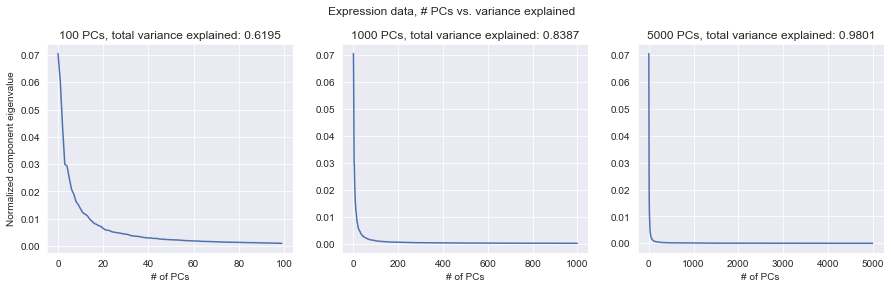

In [18]:
# plot PCA variance explained
import matplotlib.pyplot as plt
import seaborn as sns

sns.set({'figure.figsize': (15, 4)})
fig, axarr = plt.subplots(1, 3)

for ix, ve in enumerate(var_exp_list):
    sns.lineplot(x=range(len(ve)), y=ve, ax=axarr[ix])
    axarr[ix].set_title('{} PCs, total variance explained: {:.4f}'.format(
        n_pcs_list[ix], sum(ve, 0)))
    axarr[ix].set_xlabel('# of PCs')
    if ix == 0:
        axarr[ix].set_ylabel('Normalized component eigenvalue')
plt.suptitle('Expression data, # PCs vs. variance explained')
plt.subplots_adjust(top=0.85)